# Data Collection

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# Define the tickers for Bitcoin and Gold
btc_ticker = 'BTC-USD'
gold_ticker = 'GC=F'

In [3]:
# Define the start and end dates for the data collection
start_date = '2019-10-01'
end_date = datetime.today().strftime('%Y-%m-%d')

In [4]:
# Download the historical daily price data for Bitcoin and Gold
btc_data = yf.download(btc_ticker, start=start_date, end=end_date)
gold_data = yf.download(gold_ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
# Extract the 'Close' prices from the downloaded data
btc_close = btc_data['Close']
gold_close = gold_data['Close']

# Data Preprocessing

In [6]:
# Concatenate the 'Close' prices for Bitcoin and Gold into a single DataFrame
data = pd.concat([btc_close, gold_close], axis=1)
data.columns = ['Bitcoin', 'Gold']

In [7]:
# Check for missing values in the DataFrame
missing_values = data.isnull().sum()
missing_values

Bitcoin      0
Gold       428
dtype: int64

In [8]:
# Fill missing values with the previous day's value
data.fillna(method='ffill', inplace=True)

In [9]:
# Display the first few rows of the DataFrame
data.head()

,Bitcoin,Gold
Date,,
2019-10-01,8343.276367,1482.000000
2019-10-02,8393.041992,1501.000000
2019-10-03,8259.992188,1507.099976
2019-10-04,8205.939453,1506.199951
2019-10-05,8151.500488,1506.199951


# Preliminary Analysis

In [10]:
# Calculate the daily returns for Bitcoin and Gold
data_returns = data.pct_change()

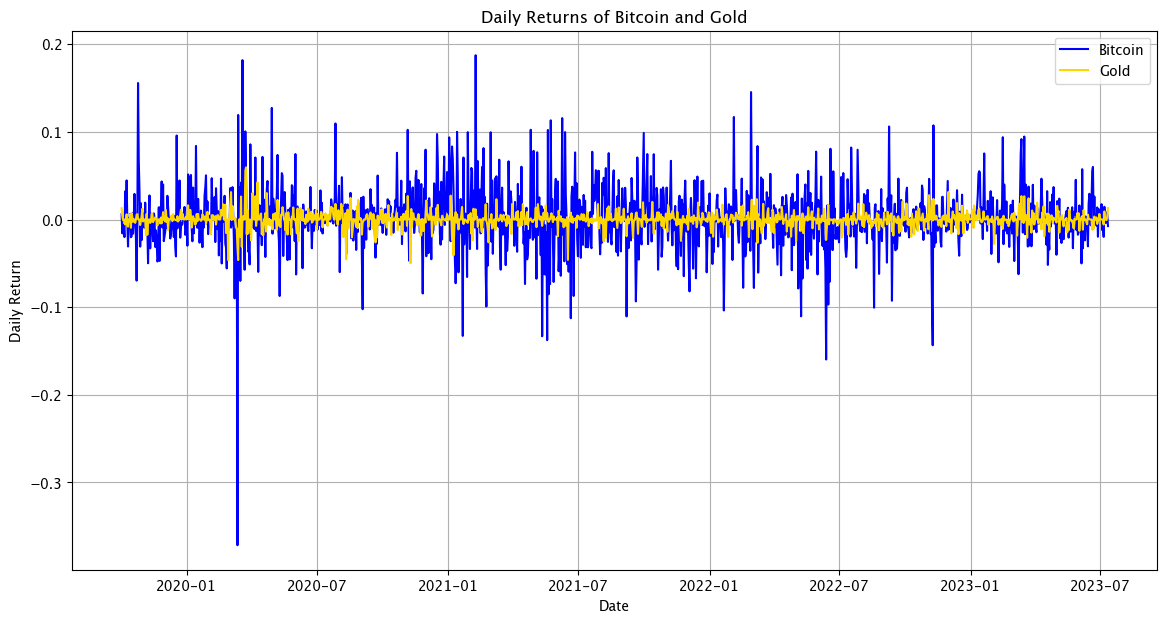

In [11]:
# Plot the time series of these daily returns
plt.figure(figsize=(14, 7))
plt.plot(data_returns['Bitcoin'], label='Bitcoin', color='blue')
plt.plot(data_returns['Gold'], label='Gold', color='gold')
plt.title('Daily Returns of Bitcoin and Gold')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.show()

# Performance During the Pandemic (October 2019 - December 2022)

In [12]:
# Slice the DataFrame of daily returns to include only the period from October 2019 to December 2022
pandemic_returns = data_returns.loc['2019-10-01':'2022-12-31']

In [13]:
# Calculate the cumulative returns of Bitcoin and Gold during this period
pandemic_cumulative_returns = (1 + pandemic_returns).cumprod()

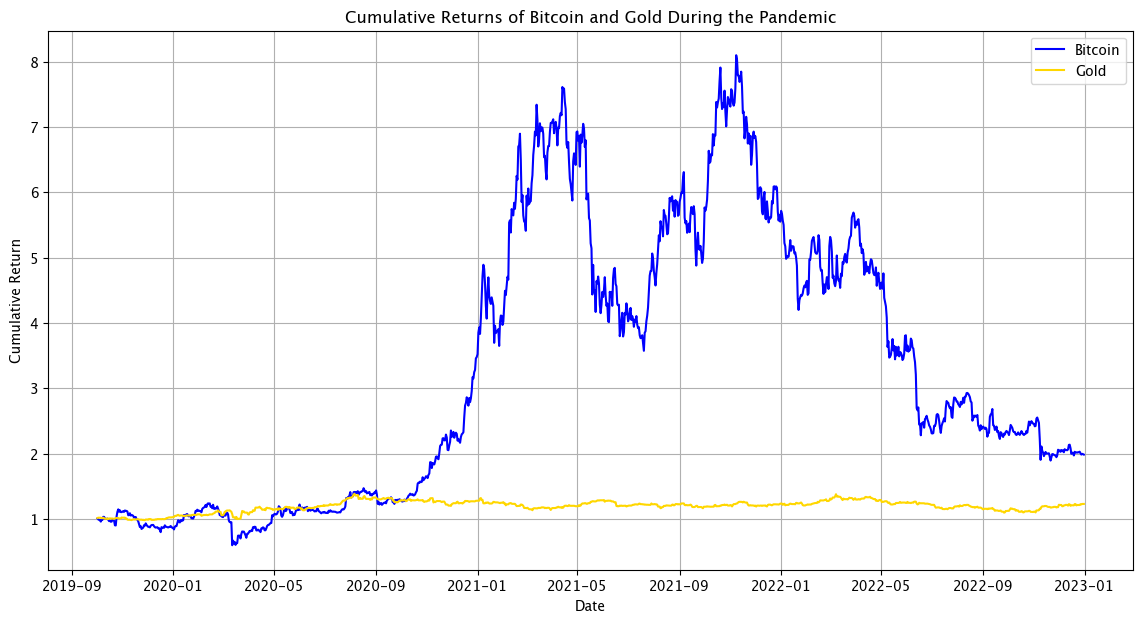

In [14]:
# Plot the time series of these cumulative returns
plt.figure(figsize=(14, 7))
plt.plot(pandemic_cumulative_returns['Bitcoin'], label='Bitcoin', color='blue')
plt.plot(pandemic_cumulative_returns['Gold'], label='Gold', color='gold')
plt.title('Cumulative Returns of Bitcoin and Gold During the Pandemic')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

# Performance During the Ukraine War (February 2022 - July 2023)

In [16]:
# Slice the DataFrame of daily returns to include only the period from February 2022 to July 2023
war_returns = data_returns.loc['2022-02-01':'2023-07-12']

In [17]:
# Calculate the cumulative returns of Bitcoin and Gold during this period
war_cumulative_returns = (1 + war_returns).cumprod()

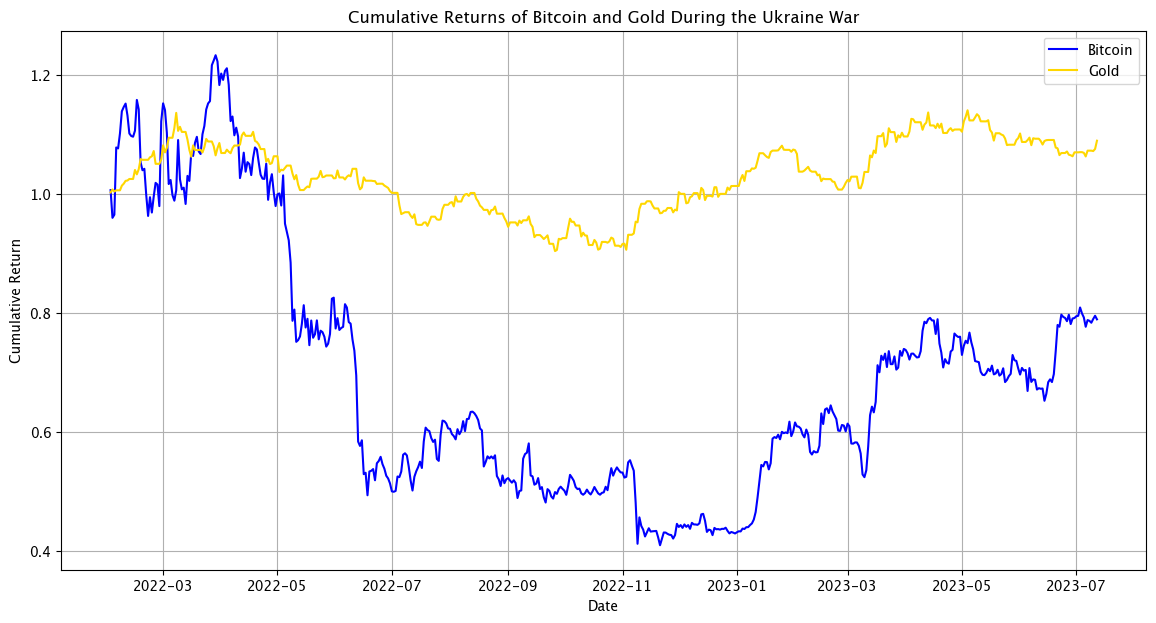

In [18]:
# Plot the time series of these cumulative returns
plt.figure(figsize=(14, 7))
plt.plot(war_cumulative_returns['Bitcoin'], label='Bitcoin', color='blue')
plt.plot(war_cumulative_returns['Gold'], label='Gold', color='gold')
plt.title('Cumulative Returns of Bitcoin and Gold During the Ukraine War')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

# Correlation Analysis During the Ukraine War & COVID-19 Pandemic

### 1.1 Correlation During the Ukraine War

In [20]:
# Calculate the correlation matrix of the returns of Bitcoin and Gold for the entire period
correlation_matrix_ukraine_war = war_returns.corr()

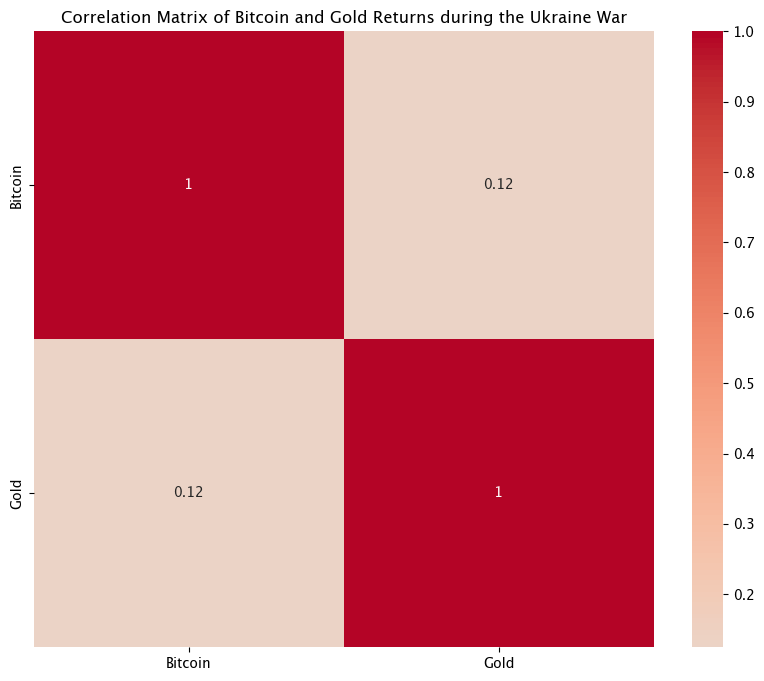

In [21]:
import seaborn as sns
# Plot the correlation matrix of the Ukraine War using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_ukraine_war, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Bitcoin and Gold Returns during the Ukraine War')
plt.show()

In [22]:
print(correlation_matrix_ukraine_war)

          Bitcoin      Gold
Bitcoin  1.000000  0.124663
Gold     0.124663  1.000000


### 1.2 Correlation during the Pandemic

In [23]:
correlation_matrix_pandemic = pandemic_returns.corr()

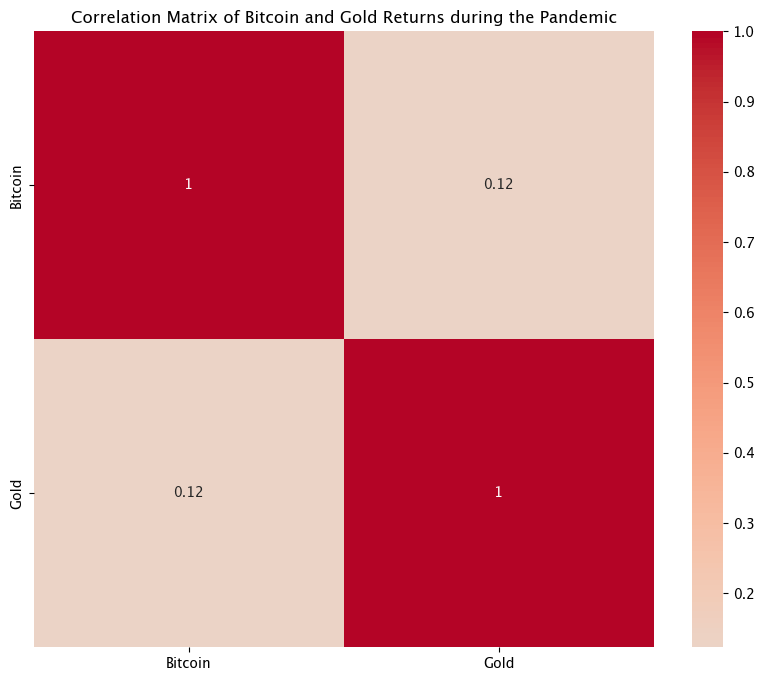

In [24]:
# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_pandemic, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Bitcoin and Gold Returns during the Pandemic')
plt.show()

In [25]:
print(correlation_matrix_pandemic)

         Bitcoin     Gold
Bitcoin  1.00000  0.12316
Gold     0.12316  1.00000


### 1.2.1 Conclusion to the correlation matrix of the COVID-19 Pandemic

#### The fact that Bitcoin and Gold have similar correlation coefficients during two distinct crisis periods suggests that there may be some underlying relationship between these two assets that persists across different market conditions. This could be due to a variety of factors, such as similar investor perceptions of these assets as "safe havens" during times of market turmoil, or similar responses to certain macroeconomic factors.

#### However, while this observation is interesting, it's important to remember that correlation does not imply causation. The similar correlation coefficients do not necessarily mean that changes in the price of Gold cause changes in the price of Bitcoin, or vice versa. It's also possible that the similar correlation coefficients are due to chance, or due to some other factors that were not included in the analysis.

#### Moreover, while the correlation coefficients are positive, they are relatively low, indicating that the relationship between Bitcoin and Gold prices is weak. This suggests that a large part of the price movements of these assets are driven by factors unique to each asset, rather than by their relationship with each other.

#### In conclusion, while the similar correlation coefficients of Bitcoin and Gold during two crisis periods are intriguing, further analysis would be needed to understand the nature of this relationship and the factors driving it.

# Risk-Adjusted Performance

### During the Ukraine War

In [27]:
# Calculate the average daily return for Bitcoin and Gold
avg_returns_war = war_returns.mean()
# Calculate the standard deviation of daily returns for Bitcoin and Gold
std_dev_war = war_returns.std()
# Calculate the Sharpe Ratio for Bitcoin and Gold
sharpe_ratio_war = avg_returns_war / std_dev_war
sharpe_ratio_war

Bitcoin    0.001014
Gold       0.024733
dtype: float64

### During the COVID-19 Pandemic

In [28]:
# Calculate the average daily return for Bitcoin and Gold
avg_returns_pandemic = pandemic_returns.mean()
# Calculate the standard deviation of daily returns for Bitcoin and Gold
std_dev_pandemic = pandemic_returns.std()
# Calculate the Sharpe Ratio for Bitcoin and Gold
sharpe_ratio_pandemic = avg_returns_pandemic / std_dev_pandemic
sharpe_ratio_pandemic

Bitcoin    0.034582
Gold       0.023833
dtype: float64

# Conclusion
#### The Sharpe Ratios for Bitcoin and Gold during both the Ukraine War and the COVID-19 pandemic periods suggest that Bitcoin had a higher risk-adjusted return than Gold during the pandemic, but a lower risk-adjusted return during the Ukraine War. The Sharpe Ratio is a measure of risk-adjusted return, calculated as the average return in excess of the risk-free rate per unit of volatility. A higher Sharpe Ratio suggests a more favorable risk/return trade-off.

#### During the COVID-19 pandemic, Bitcoin's Sharpe Ratio was 0.034582, higher than Gold's Sharpe Ratio of 0.023833. This suggests that, after adjusting for risk, Bitcoin provided a higher return than Gold during this period.

#### However, during the Ukraine War, Bitcoin's Sharpe Ratio was 0.001014, lower than Gold's Sharpe Ratio of 0.024733. This suggests that, after adjusting for risk, Gold provided a higher return than Bitcoin during this period.

#### The correlation matrices for the two periods show a positive but weak correlation between Bitcoin and Gold returns. The correlation coefficients were 0.12316 during the pandemic and 0.124663 during the Ukraine War. This suggests that Bitcoin and Gold prices tended to move in the same direction to some extent, but the relationship was weak. The similar correlation coefficients during the two periods suggest that the relationship between Bitcoin and Gold prices remained relatively stable across different market conditions.

#### In conclusion, while Bitcoin provided a higher risk-adjusted return than Gold during the COVID-19 pandemic, Gold provided a higher risk-adjusted return during the Ukraine War. The correlation between Bitcoin and Gold returns was positive but weak during both periods, suggesting that while there may be some common factors influencing both Bitcoin and Gold prices, a large part of their price movements are likely driven by factors unique to each asset.